In [1]:
import zipfile
import requests
!pip3 install opencv-python
import cv2
!pip3 install matplotlib

import matplotlib.pyplot as plt
import glob 
import random
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 64.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 100.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 113.3 MB/s eta 0:00:00


## Install Ultralytics Package

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 8.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 34.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 81.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 72.8 MB/s eta 0:00:00


## Download the Dataset

In [3]:
os.makedirs('datasets', exist_ok=True)

In [4]:
%cd datasets

/workspace/datasets


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
        
download_file(
    'https://www.dropbox.com/s/qvglw8pqo16769f/pothole_dataset_v8.zip?dl=1',
    'pothole_dataset_v8.zip'
)

In [6]:
# Unzip the data file
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

unzip('pothole_dataset_v8.zip')

Extracted all


In [7]:
%cd ..

/workspace


## Visualize Images from the Dataset

In [8]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [9]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))
                
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [10]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))
    
    all_images.sort()

    num_images = len(all_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

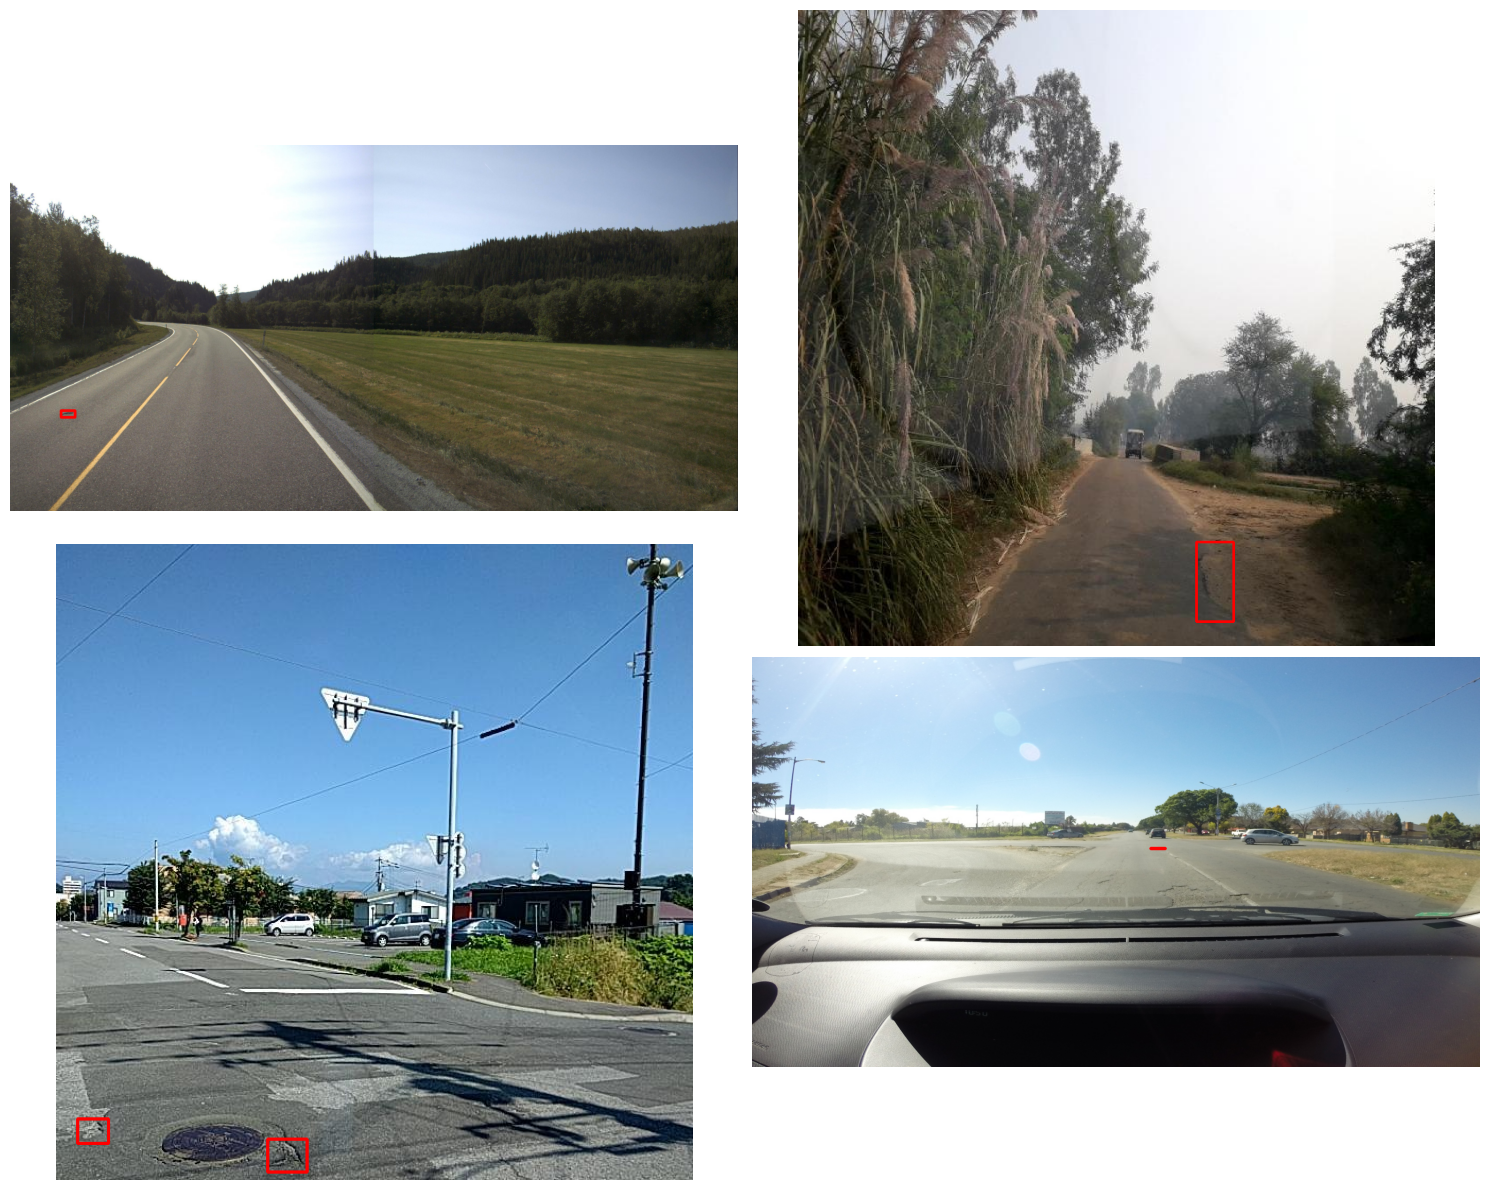

In [11]:
# Visualize a few training images.
plot(
    image_paths='datasets/pothole_dataset_v8/train/images/', 
    label_paths='datasets/pothole_dataset_v8/train/labels/',
    num_samples=4,
)

## Dataset YAML File

In [12]:
%%writefile pothole_v8.yaml
path: 'pothole_dataset_v8/'
train: 'train/images'
val: 'valid/images'

# class names
names: 
  0: 'pothole'

Writing pothole_v8.yaml


## YOLOv8 Nano Training

In [13]:
# Sample training for 5 epoch.
EPOCHS = 5
!yolo task=detect mode=train model=yolov8n.pt imgsz=1280 data=pothole_v8.yaml epochs={EPOCHS} batch=8 name=yolov8n_v8_50e

100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 68.9MB/s]
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4080, 16079MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=pothole_v8.yaml, epochs=5, patience=50, batch=8, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_n

## Evaluation on Validation Images

In [14]:
!yolo task=detect mode=val model=runs/detect/yolov8n_v8_50e/weights/best.pt name=yolov8n_eval data=pothole_v8.yaml

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4080, 16079MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /workspace/datasets/pothole_dataset_v8/valid/labels.cache... 271 i
val: WARNING ⚠️ /workspace/datasets/pothole_dataset_v8/valid/images/G0011603.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /workspace/datasets/pothole_dataset_v8/valid/images/G0011614.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /workspace/datasets/pothole_dataset_v8/valid/images/G0011616.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /workspace/datasets/pothole_dataset_v8/valid/images/G0011661.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /workspace/datasets/pothole_dataset_v8/valid/images/G0011662.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /workspace/datasets/pothole_dataset_v8/valid/images/G0011664.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /workspace/datasets/pothole_dataset_v8/valid/images/G0011677.jpg: 1

## Inference on Validation Images

In [19]:
!yolo task=detect \
mode=predict \
model=runs/detect/yolov8n_v8_50e/weights/best.pt \
source=datasets/pothole_dataset_v8/valid/images \
imgsz=1280 \
name=yolov8n_v8_50e_infer1280 \
hide_labels=True \
save_txt=True \
save_conf=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4080, 16079MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/271 /workspace/datasets/pothole_dataset_v8/valid/images/G0011195.jpg: 736x1280 (no detections), 94.8ms
image 2/271 /workspace/datasets/pothole_dataset_v8/valid/images/G0011196.jpg: 736x1280 2 potholes, 6.0ms
image 3/271 /workspace/datasets/pothole_dataset_v8/valid/images/G0011242.jpg: 736x1280 1 pothole, 5.7ms
image 4/271 /workspace/datasets/pothole_dataset_v8/valid/images/G0011243.jpg: 736x1280 2 potholes, 5.8ms
image 5/271 /workspace/datasets/pothole_dataset_v8/valid/images/G0011244.jpg: 736x1280 1 pothole, 5.7ms
image 6/271 /workspace/datasets/pothole_dataset_v8/valid/images/G0011427.jpg: 736x1280 (no detections), 5.7ms
image 7/271 /workspace/datasets/pothole_dataset_v

image 152/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/G0011941.jpg: 736x1280 2 potholes, 12.9ms
image 153/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/G0011942.jpg: 736x1280 1 pothole, 13.3ms
image 154/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/G0011943.jpg: 736x1280 1 pothole, 13.0ms
image 155/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/G0011947.jpg: 736x1280 2 potholes, 13.2ms
image 156/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Cus

image 189/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-101_jpg.rf.f2b523ae66c89b3576935bce8d6cff7f.jpg: 736x1280 13.1ms
image 190/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-103_jpg.rf.03b85ba0c77ecb807164864114366680.jpg: 736x1280 13.6ms
image 191/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-104_jpg.rf.b96781880df5be4533deb9aa122a5fa2.jpg: 736x1280 13.4ms
image 192/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-107_jpg.rf.047c32191fcb8b9394b556bc28d86b17.jpg: 736x1280

image 221/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-155_jpg.rf.1f2504bf50751764a9869bda1b9ff446.jpg: 736x1280 13.3ms
image 222/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-156_jpg.rf.7de75186c4dfad8e1880d129b8a9126f.jpg: 736x1280 13.3ms
image 223/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-158_jpg.rf.69910b385c47356ae1ae2c964ea3356e.jpg: 736x1280 13.3ms
image 224/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-159_jpg.rf.cebbb007cb512ee03704c25aef1a55b8.jpg: 736x1280

image 254/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-71_jpg.rf.a66c7ead4152e3634f1d01604a09729f.jpg: 736x1280 13.2ms
image 255/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-73_jpg.rf.4d0ebe8bd78382854887c85af26c88b0.jpg: 736x1280 13.3ms
image 256/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-74_jpg.rf.b6a7c408ac473908998a74a364e61587.jpg: 736x1280 13.1ms
image 257/271 /media/sovit/hdd1tbinternal/my_data/Data_Science/Big_Vision/my_blogs/Train-YOLOv8-on-Custom-Dataset-Complete-Tutorial/notebooks/datasets/pothole_dataset_v8/valid/images/img-79_jpg.rf.00fb662d8b19ea40165f6597578c18db.jpg: 736x1280 13.

In [22]:
!touch /detect/yolov8n_v8_50e_infer12803/labels/yolov8_predictions.json

touch: cannot touch '/detect/yolov8n_v8_50e_infer12803/labels/yolov8_predictions.json': No such file or directory


In [24]:
import json
from pathlib import Path

def convert_yolo_predictions_to_json(predictions_folder, output_json_path):
    results = []
    for txt_file in Path(predictions_folder).glob('*.txt'):
        image_id = txt_file.stem  # Assuming the text file's name is the image ID
        with open(txt_file, 'r') as file:
            for line in file:
                class_id, confidence, x_center, y_center, width, height = line.strip().split()
                bbox = [float(x_center), float(y_center), float(width), float(height)]  # Convert to COCO format if needed
                results.append({
                    "image_id": image_id,
                    "category_id": int(class_id),
                    "bbox": bbox,
                    "score": float(confidence)
                })

    with open(output_json_path, 'w') as json_file:
        json.dump(results, json_file)

# Example usage
predictions_folder = '/workspace/runs/detect/yolov8n_v8_50e_infer12803/labels'
output_json_path = '/workspace/runs/detect/yolov8n_v8_50e_infer12803/labels/yolov8_predictions.json'
convert_yolo_predictions_to_json(predictions_folder, output_json_path)


In [26]:
!pip install sahi pandas numpy opencv-python pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 68.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 22.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=3dde0cd03d71e277c79daa53bd84a6f60ec86beffa6fc8865c209278b791e429
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.1.78
    Uninstalling opencv-python-4.8.1.78:
      Successfully uninstalled opencv-python-4.8.1.78


In [35]:
import numpy as np
import pandas as pd
import os
import json
from pathlib import Path
from PIL import Image
from tqdm import tqdm
from sahi.utils.coco import Coco, CocoCategory, CocoImage, CocoAnnotation
from sahi.utils.file import save_json

# Define your class dictionary depending on how many classes you have. 
# Here, I'm assuming '0' is for potholes. Adjust as per your dataset.
class_dic = {0: "pothole"}

def yolo_to_coco(x_center, y_center, w, h, image_w, image_h):
    # Convert YOLO format to COCO format
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w) / 2
    y1 = ((2 * y_center * image_h) - h) / 2
    return [x1, y1, w, h]

def convert_to_COCO(image_path, json_name):
    coco = Coco()
    for key, item in class_dic.items():
        coco.add_category(CocoCategory(id=key, name=item))

    # Adjust the glob pattern as per your folder structure
    image_path_list = list(Path(image_path).glob("*.jpg"))
    label_path_list = [Path(str(p).replace('images', 'labels').replace('.jpg', '.txt')) for p in image_path_list]

    print(f'The number of images: {len(image_path_list)}')
    print(f'The number of labels: {len(label_path_list)}')

    no_annotation = 0
    for img_path, l_path in tqdm(zip(image_path_list, label_path_list), total=len(image_path_list)):
        ImageHeight, Imagewidth = Image.open(img_path).size
        if os.path.isfile(l_path):
            coco_image = CocoImage(file_name=str(img_path.name), height=ImageHeight, width=Imagewidth)
            with open(str(l_path)) as f:
                lines = f.readlines()
                for line in lines:
                    line = line.strip()
                    obj_class, x_center, y_center, width_yolo, height_yolo = line.split(' ')
                    bbox = yolo_to_coco(float(x_center), float(y_center), float(width_yolo), float(height_yolo), Imagewidth, ImageHeight)
                    cat_name = class_dic[int(obj_class)]
                    coco_image.add_annotation(CocoAnnotation(bbox=bbox, category_id=int(obj_class), category_name=cat_name))
            coco.add_image(coco_image)
        else:
            no_annotation += 1

    print(f"The number of images that don't have a label: {no_annotation}")
    save_path = json_name
    save_json(data=coco.json, save_path=save_path)
    print('COCO Json File Created.')

# Specify your dataset paths
image_path = '/workspace/datasets/pothole_dataset_v8/valid/images/'
json_name_file = '/workspace/datasets/pothole_dataset_v8/valid/gt3.json'
convert_to_COCO(image_path, json_name_file)


The number of images: 271
The number of labels: 271


100%|██████████| 271/271 [00:00<00:00, 2426.65it/s]

The number of images that don't have a label: 0
COCO Json File Created.


In [30]:
!pip install pycocotools



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 6.4 MB/s eta 0:00:00a 0:00:01


In [39]:
# COCO Evaluation Code
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import json

# Load ground truth annotations
ground_truth_annotations_path = '/workspace/datasets/pothole_dataset_v8/valid/gt5.json'  # Correct path
cocoGt = COCO(ground_truth_annotations_path)

# Load YOLOv8 detections (predictions in COCO format)
detections_path = '/workspace/runs/detect/yolov8n_v8_50e_infer12803/labels/yolov8_predictions.json'  # Correct path
cocoDt = cocoGt.loadRes(detections_path)

# Running COCO evaluation
cocoEval = COCOeval(cocoGt, cocoDt, 'bbox')
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

loading annotations into memory...


JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 112 (char 111)

## Visualize Validation Results

## Visualize Validation Results

In [16]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

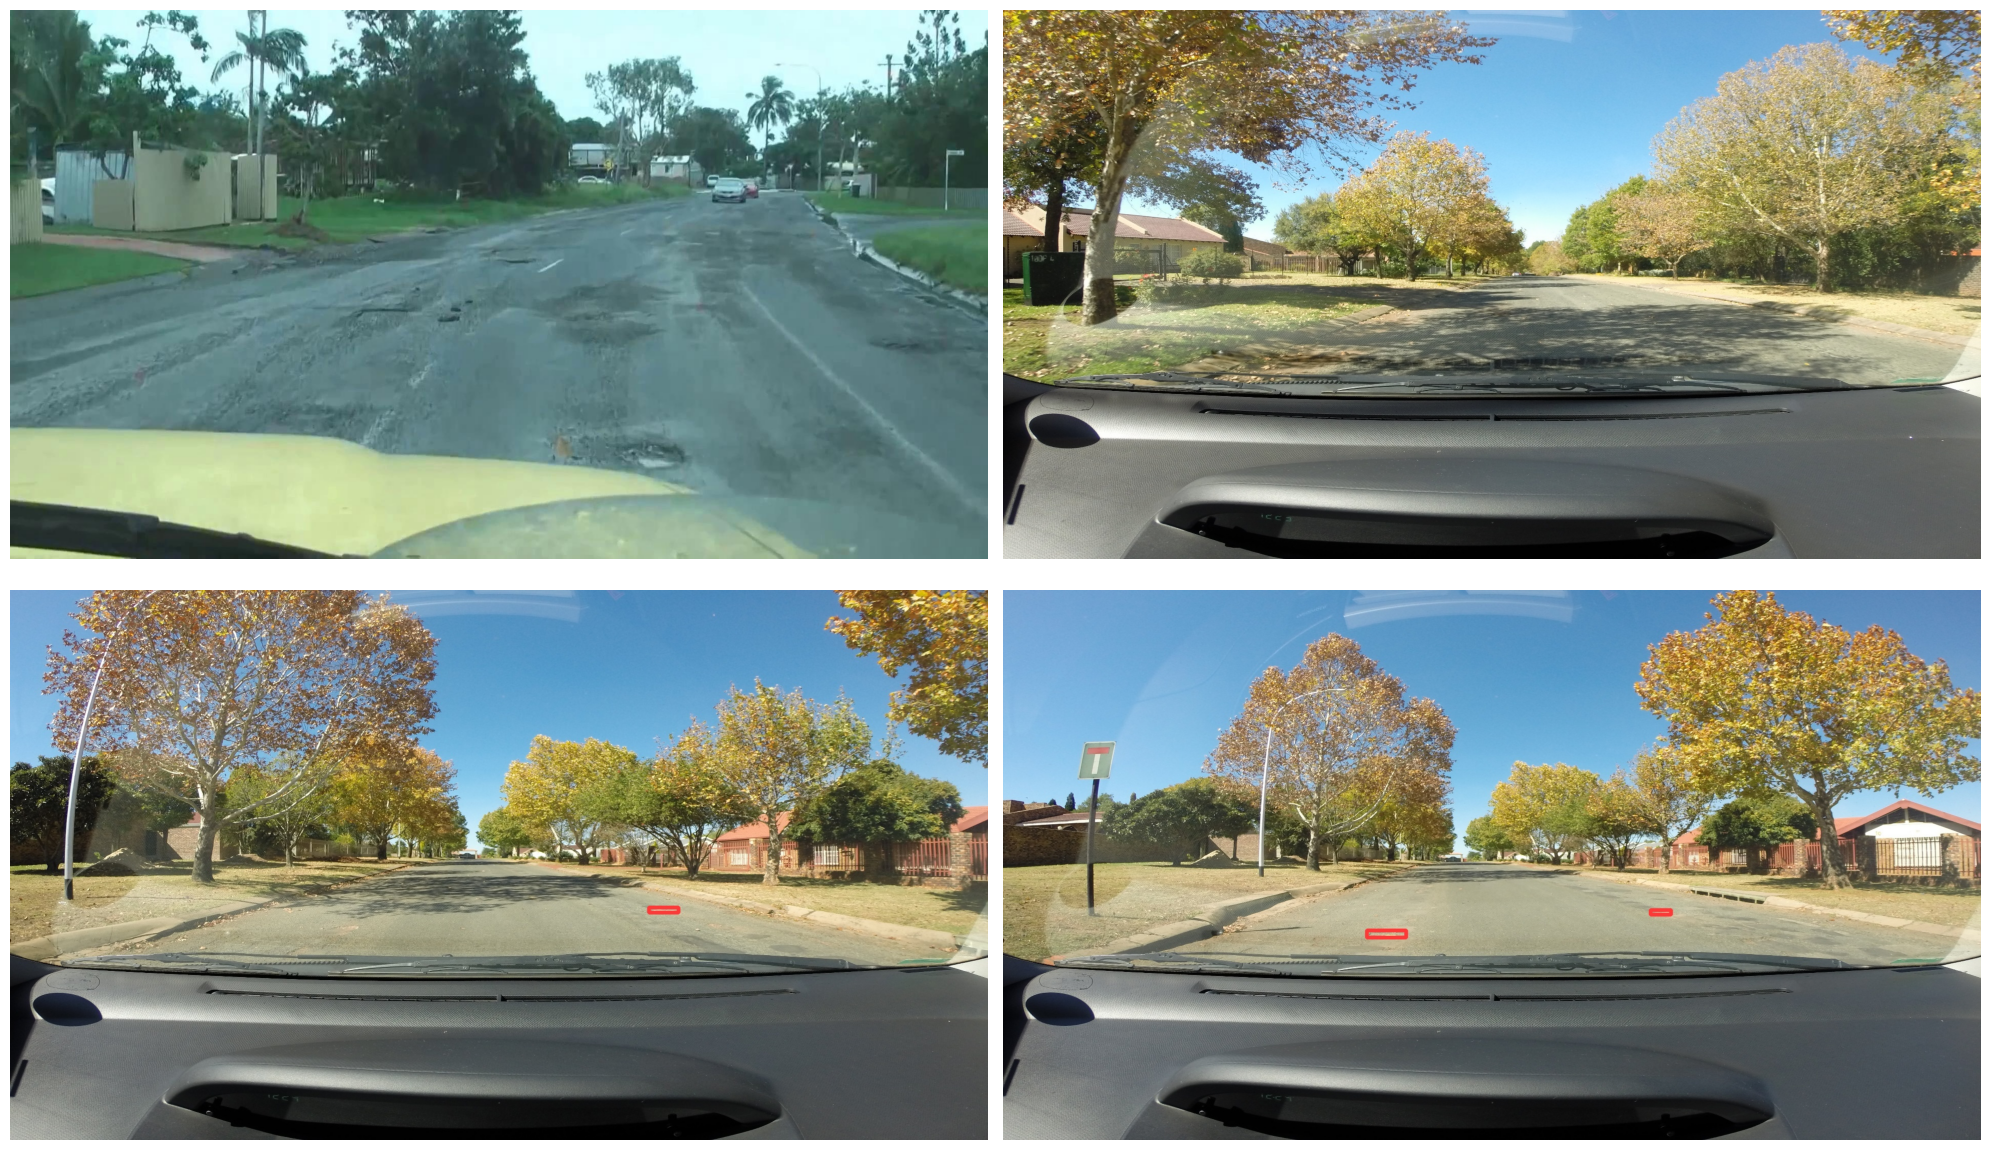

In [17]:
visualize('runs/detect/yolov8n_v8_50e_infer1280/')